In [51]:
#base libs
import sklearn
import numpy as np

#dataset
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as split

#visualization
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

#models
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#metrics
from sklearn.metrics import classification_report, confusion_matrix 

In [52]:
import os
print(os.getcwd())

C:\Users\intit\Documents\loan


In [53]:
df = pd.read_csv(r"C:\Users\intit\Documents\loan\loan_approval.csv")

In [54]:
df["loan_approved"].value_counts(normalize=True)

loan_approved
False    0.5605
True     0.4395
Name: proportion, dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [56]:
df.tail(n=10)

name              city  income  credit_score  \
1990        Rebecca Newman  West Christopher  117177           712   
1991  Christopher Morrison         Cookshire   63408           376   
1992         Sierra Gentry      Jenniferstad   79060           572   
1993         Hannah Carter           Basston   50006           626   
1994           Ryan Thomas         Tylertown  120023           318   
1995        James Schaefer         Robertton   92163           770   
1996             Diana Lin         New Frank   38799           635   
1997         Brandon Meyer        East Haley   41957           763   
1998           Jason Price          Adamland  139022           360   
1999          Nicole Brown    New Nathantown   41188           482   

      loan_amount  years_employed  points  loan_approved  
1990        10028              27    85.0           True  
1991        30443               3    25.0          False  
1992         9643               6    45.0          False  
1993        29515              32    50.0          False  
1994        49124               3    35.0          False  
1995        12251              13    85.0           True  
1996        48259              17    40.0          False  
1997        16752               5    60.0           True  
1998        24031              35    55.0          False  
1999        31397               6    20.0          False

<Axes: >

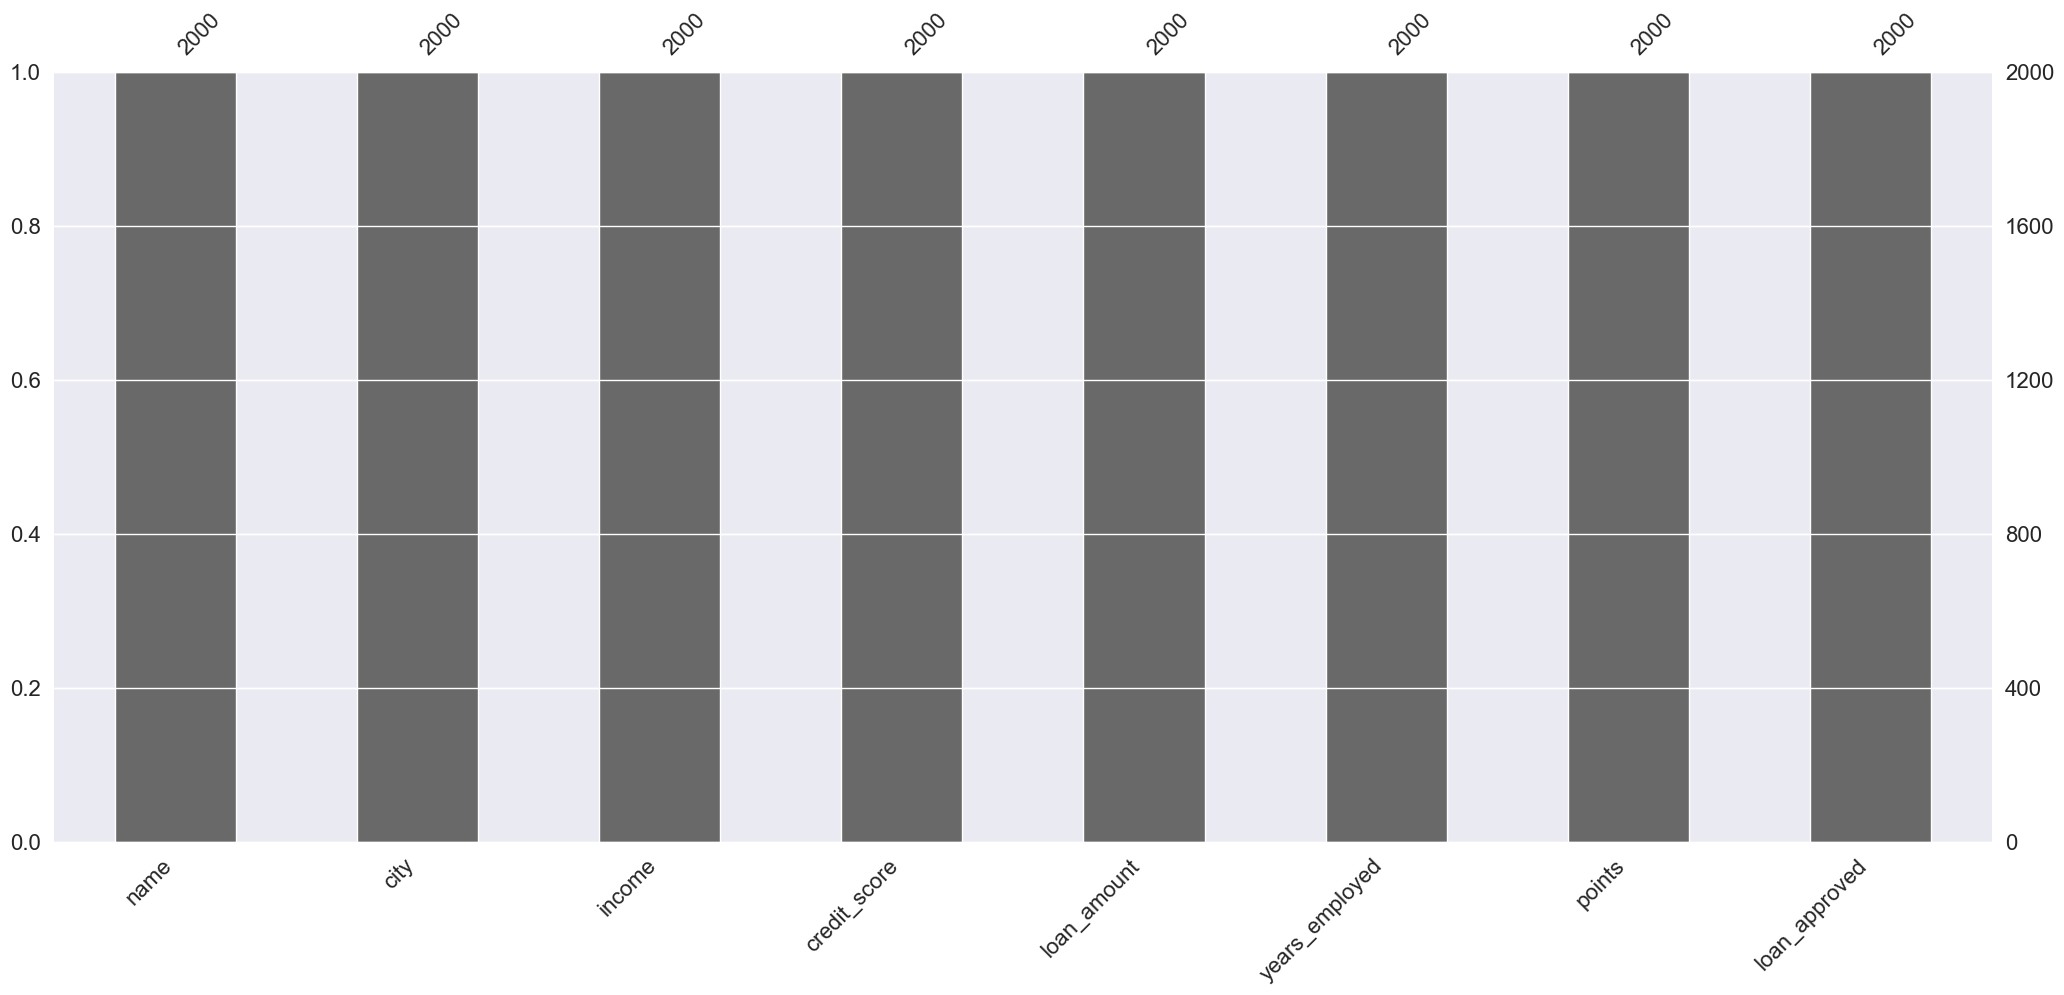

In [57]:
msno.bar(df)

In [58]:
corr = df.select_dtypes(include=["int64", "float64"]).corr()
corr

income  credit_score  loan_amount  years_employed    points
income          1.000000     -0.027113     0.037612       -0.014441  0.451142
credit_score   -0.027113      1.000000    -0.008076        0.023598  0.740899
loan_amount     0.037612     -0.008076     1.000000        0.013015 -0.223039
years_employed -0.014441      0.023598     0.013015        1.000000  0.156441
points          0.451142      0.740899    -0.223039        0.156441  1.000000

<Axes: >

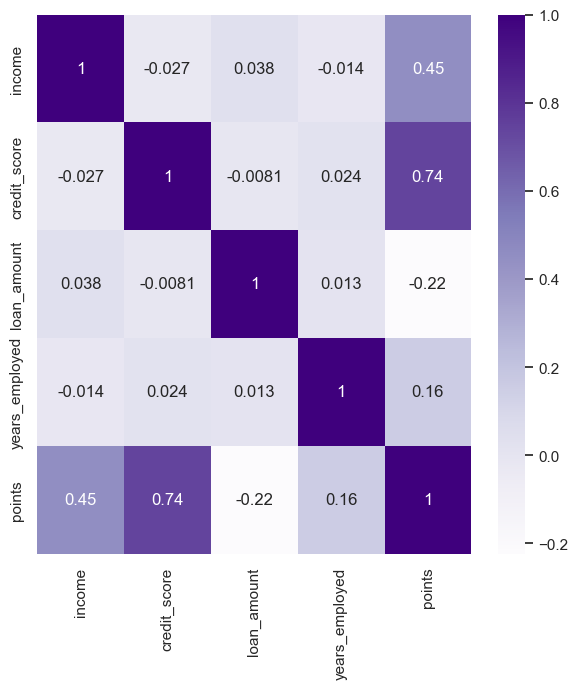

In [59]:
sn.set(rc = {
    "figure.figsize": (7, 7)
})
sn.heatmap(corr, annot = True, cmap = "Purples")

In [60]:
df.describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     30053.000000    300.000000   1022.000000        0.000000    10.000000
1%      31502.260000    305.000000   1454.920000        0.000000    20.000000
5%      36865.900000    328.000000   3300.900000        2.000000    25.000000
25%     61296.250000    433.000000  12748.750000       10.000000    45.000000
50%     90387.500000    576.000000  25661.500000       21.000000    55.000000
75%    120099.750000    715.000000  37380.500000       31.000000    70.000000
95%    143992.050000    822.050000  47394.600000       39.000000    90.000000
99%    148863.090000    843.010000  49296.210000       40.000000    95.050000
max    149964.000000    850.000000  49999.000000       40.000000   100.000000

In [61]:
minmax = preprocessing.MinMaxScaler()

In [84]:
df

name              city  income  credit_score  loan_amount  \
0        Allison Hill         East Jill  113810           389        39698   
1        Brandon Hall     New Jamesside   44592           729        15446   
2        Rhonda Smith      Lake Roberto   33278           584        11189   
3     Gabrielle Davis  West Melanieview  127196           344        48823   
4        Valerie Gray         Mariastad   66048           496        47174   
...               ...               ...     ...           ...          ...   
1995   James Schaefer         Robertton   92163           770        12251   
1996        Diana Lin         New Frank   38799           635        48259   
1997    Brandon Meyer        East Haley   41957           763        16752   
1998      Jason Price          Adamland  139022           360        24031   
1999     Nicole Brown    New Nathantown   41188           482        31397   

      years_employed  points  loan_approved  
0                 27    50.0          False  
1                 28    55.0          False  
2                 13    45.0          False  
3                 29    50.0          False  
4                  4    25.0          False  
...              ...     ...            ...  
1995              13    85.0           True  
1996              17    40.0          False  
1997               5    60.0           True  
1998              35    55.0          False  
1999               6    20.0          False  

[2000 rows x 8 columns]

In [96]:
X = df.drop(["name", "city", "loan_approved"], axis=1)
y = df["loan_approved"].values

In [97]:
X_sc = minmax.fit_transform(X)

In [98]:
df.describe().loc[["min","max"]].T

min       max
income          30053.0  149964.0
credit_score      300.0     850.0
loan_amount      1022.0   49999.0
years_employed      0.0      40.0
points             10.0     100.0

In [99]:
pca = PCA()
pca.fit(X_sc)

PCA()

In [100]:
pca_range = np.arange(1, X_sc.shape[1] + 1)
pca_range

array([1, 2, 3, 4, 5])

In [106]:
X_train, x_test, y_train, y_test = split(X, y, test_size = 0.5, shuffle = True, random_state = 27)
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [107]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [108]:
predictions = model.predict(x_test)
predictions

array([ True,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True,

In [109]:
y_test

array([ True,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True,

In [110]:
print(classification_report(y_test, predictions, digits = 3))

              precision    recall  f1-score   support

       False      0.991     0.979     0.985       565
        True      0.973     0.989     0.981       435

    accuracy                          0.983      1000
   macro avg      0.982     0.984     0.983      1000
weighted avg      0.983     0.983     0.983      1000

